<a href="https://colab.research.google.com/github/Kacper-Cieslak/Kaggle-projects/blob/master/mechanisms_of_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip 'drive/My Drive/DS/medical_ml/lish-moa.zip' -d 'drive/My Drive/DS/lish_moa/'

Archive:  drive/My Drive/DS/medical_ml/lish-moa.zip
  inflating: drive/My Drive/DS/lish_moa/sample_submission.csv  
  inflating: drive/My Drive/DS/lish_moa/test_features.csv  
  inflating: drive/My Drive/DS/lish_moa/train_features.csv  
  inflating: drive/My Drive/DS/lish_moa/train_targets_nonscored.csv  
  inflating: drive/My Drive/DS/lish_moa/train_targets_scored.csv  


### Load tools we need

In [43]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder as le
import sklearn
from sklearn.model_selection import train_test_split

# Load data

In [3]:
df = pd.read_csv('drive/My Drive/DS/lish_moa/train_features.csv')
df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
# info 
df.info

<bound method DataFrame.info of              sig_id      cp_type  cp_time  ...    c-97    c-98    c-99
0      id_000644bb2       trt_cp       24  ...  0.2139  0.3801  0.4176
1      id_000779bfc       trt_cp       72  ...  0.1241  0.6077  0.7371
2      id_000a6266a       trt_cp       48  ... -0.2187 -1.4080  0.6931
3      id_0015fd391       trt_cp       48  ... -0.8784 -0.3876 -0.8154
4      id_001626bd3       trt_cp       72  ...  0.2885 -0.3786  0.7125
...             ...          ...      ...  ...     ...     ...     ...
23809  id_fffb1ceed       trt_cp       24  ...  0.9171  0.5258  0.4680
23810  id_fffb70c0c       trt_cp       24  ... -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  ctl_vehicle       48  ...  0.7592  0.6656  0.3808
23812  id_fffcb9e7c       trt_cp       24  ...  0.7015 -0.6290  0.0740
23813  id_ffffdd77b       trt_cp       72  ... -0.4775 -2.1500 -4.2520

[23814 rows x 876 columns]>

In [5]:
df.cp_type.unique(), df.cp_dose.unique()

(array(['trt_cp', 'ctl_vehicle'], dtype=object),
 array(['D1', 'D2'], dtype=object))

In [6]:
# Check missing data
df.isna().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

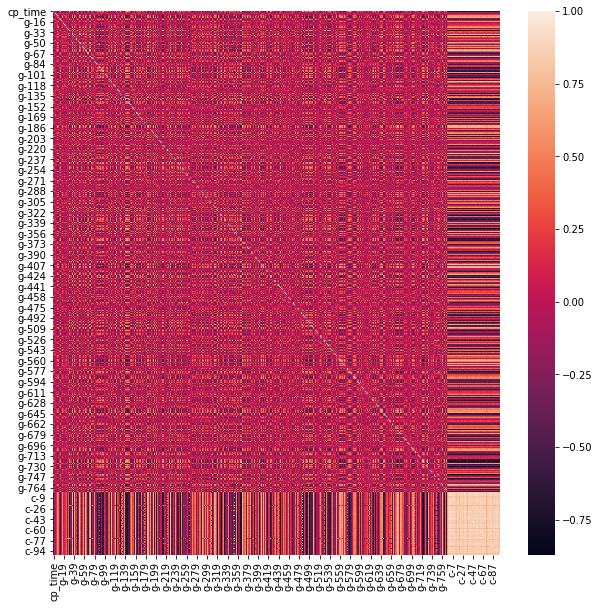

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.figure(figsize=(10, 10))
cor = df[:1000].corr()
sns.heatmap(cor);

### CP TYPE

In [30]:
def bar_plot(data, title):
  ax, fig = plt.subplots(figsize=(7,7))
  data.value_counts().plot.bar(color=['salmon', 'green'])
  plt.title(title)
  plt.show();

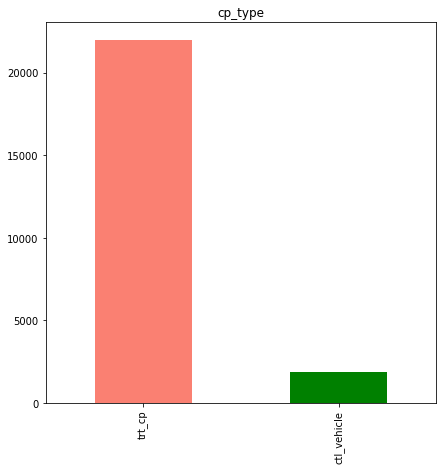

In [31]:
bar_plot(df.cp_type, 'cp_type')

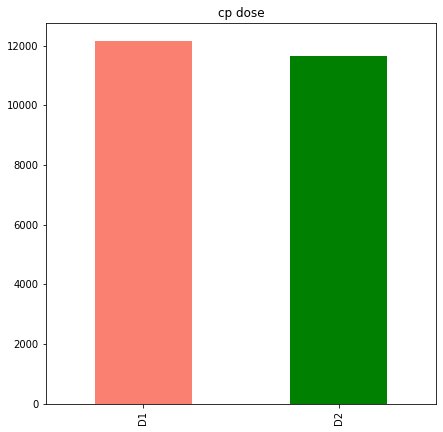

In [32]:
bar_plot(df.cp_dose, 'cp dose')

In [58]:
train_scored = pd.read_csv("drive/My Drive/DS/lish_moa/train_targets_scored.csv")
train = pd.read_csv("drive/My Drive/DS/lish_moa/train_features.csv")
test = pd.read_csv("drive/My Drive/DS/lish_moa/test_features.csv")
sample = pd.read_csv("drive/My Drive/DS/lish_moa/sample_submission.csv")


### Transform data 

In [59]:
train_scored = train_scored.drop('sig_id', axis=1)

In [60]:
train = np.array(train_features)
test = np.array(test_features)
train_scored = np.array(train_scored)

In [61]:
train

array([[0, 'trt_cp', 24, ..., 0.2139, 0.3801, 0.4176],
       [1, 'trt_cp', 72, ..., 0.1241, 0.6077, 0.7371],
       [2, 'trt_cp', 48, ..., -0.2187, -1.408, 0.6931],
       ...,
       [23811, 'ctl_vehicle', 48, ..., 0.7592, 0.6656, 0.3808],
       [23812, 'trt_cp', 24, ..., 0.7015, -0.629, 0.074],
       [23813, 'trt_cp', 72, ..., -0.4775, -2.15, -4.252]], dtype=object)

In [76]:
train[:, 0] = le().fit_transform(train[:, 0])
train[:, 1] = le().fit_transform(train[:, 1])
train[:, 3] = le().fit_transform(train[:, 3])
test[:, 0] = le().fit_transform(test[:, 0])
test[:, 1] = le().fit_transform(test[:, 1])
test[:, 3] = le().fit_transform(test[:, 3])

In [77]:
train, test

(array([[0, 1, 24, ..., 0.2139, 0.3801, 0.4176],
        [1, 1, 72, ..., 0.1241, 0.6077, 0.7371],
        [2, 1, 48, ..., -0.2187, -1.408, 0.6931],
        ...,
        [23811, 0, 48, ..., 0.7592, 0.6656, 0.3808],
        [23812, 1, 24, ..., 0.7015, -0.629, 0.074],
        [23813, 1, 72, ..., -0.4775, -2.15, -4.252]], dtype=object),
 array([[0, 1, 24, ..., -0.0502, 0.151, -0.775],
        [1, 1, 72, ..., -0.4764, -1.381, -0.73],
        [2, 0, 24, ..., 1.016, 0.4924, -0.1942],
        ...,
        [3979, 1, 72, ..., 0.5888, -0.4205, -0.1504],
        [3980, 1, 48, ..., 0.5074, 0.743, -0.0484],
        [3981, 1, 72, ..., 0.0757, -0.1356, 0.528]], dtype=object))

In [78]:
train_score = np.asarray(train_scored).astype('float32')
train = np.asarray(train).astype('float32')
test = np.asarray(test).astype('float32')

train_score = tf.keras.utils.normalize(train_score, axis=-1, order=2)
traine = tf.keras.utils.normalize(train, axis=-1, order=2)
test = tf.keras.utils.normalize(test, axis=-1, order=2)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(train, train_score, test_size=0.2, random_state=42)

In [87]:
def model():

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dense(206, activation=tf.nn.softmax))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), loss='binary_crossentropy', metrics='accuracy')

  return model

model_1 = model()
model_1.fit(X_train, y_train, epochs=30)

Epoch 1/30
596/596 [==============================] - 3s 5ms/step - loss: 0.1219 - accuracy: 0.0012
Epoch 2/30
596/596 [==============================] - 3s 5ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 3/30
596/596 [==============================] - 3s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 4/30
596/596 [==============================] - 3s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 5/30
596/596 [==============================] - 3s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 6/30
596/596 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 7/30
596/596 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 8/30
596/596 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 9/30
596/596 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.0013
Epoch 10/30
596/596 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.0013

In [89]:
preds = model_1.predict(test)

In [90]:
preds = pd.DataFrame(preds)

In [91]:
target_name = ['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor', 'acat_inhibitor', 'acetylcholine_receptor_agonist', 'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor', 'adenosine_receptor_agonist', 'adenosine_receptor_antagonist', 'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist', 'adrenergic_receptor_antagonist', 'akt_inhibitor', 'aldehyde_dehydrogenase_inhibitor', 'alk_inhibitor', 'ampk_activator', 'analgesic', 'androgen_receptor_agonist', 'androgen_receptor_antagonist', 'anesthetic_-_local', 'angiogenesis_inhibitor', 'angiotensin_receptor_antagonist', 'anti-inflammatory', 'antiarrhythmic', 'antibiotic', 'anticonvulsant', 'antifungal', 'antihistamine', 'antimalarial', 'antioxidant', 'antiprotozoal', 'antiviral', 'apoptosis_stimulant', 'aromatase_inhibitor', 'atm_kinase_inhibitor', 'atp-sensitive_potassium_channel_antagonist', 'atp_synthase_inhibitor', 'atpase_inhibitor', 'atr_kinase_inhibitor', 'aurora_kinase_inhibitor', 'autotaxin_inhibitor', 'bacterial_30s_ribosomal_subunit_inhibitor', 'bacterial_50s_ribosomal_subunit_inhibitor', 'bacterial_antifolate', 'bacterial_cell_wall_synthesis_inhibitor', 'bacterial_dna_gyrase_inhibitor', 'bacterial_dna_inhibitor', 'bacterial_membrane_integrity_inhibitor', 'bcl_inhibitor', 'bcr-abl_inhibitor', 'benzodiazepine_receptor_agonist', 'beta_amyloid_inhibitor', 'bromodomain_inhibitor', 'btk_inhibitor', 'calcineurin_inhibitor', 'calcium_channel_blocker', 'cannabinoid_receptor_agonist', 'cannabinoid_receptor_antagonist', 'carbonic_anhydrase_inhibitor', 'casein_kinase_inhibitor', 'caspase_activator', 'catechol_o_methyltransferase_inhibitor', 'cc_chemokine_receptor_antagonist', 'cck_receptor_antagonist', 'cdk_inhibitor', 'chelating_agent', 'chk_inhibitor', 'chloride_channel_blocker', 'cholesterol_inhibitor', 'cholinergic_receptor_antagonist', 'coagulation_factor_inhibitor', 'corticosteroid_agonist', 'cyclooxygenase_inhibitor', 'cytochrome_p450_inhibitor', 'dihydrofolate_reductase_inhibitor', 'dipeptidyl_peptidase_inhibitor', 'diuretic', 'dna_alkylating_agent', 'dna_inhibitor', 'dopamine_receptor_agonist', 'dopamine_receptor_antagonist', 'egfr_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'estrogen_receptor_agonist', 'estrogen_receptor_antagonist', 'faah_inhibitor', 'farnesyltransferase_inhibitor', 'fatty_acid_receptor_agonist', 'fgfr_inhibitor', 'flt3_inhibitor', 'focal_adhesion_kinase_inhibitor', 'free_radical_scavenger', 'fungal_squalene_epoxidase_inhibitor', 'gaba_receptor_agonist', 'gaba_receptor_antagonist', 'gamma_secretase_inhibitor', 'glucocorticoid_receptor_agonist', 'glutamate_inhibitor', 'glutamate_receptor_agonist', 'glutamate_receptor_antagonist', 'gonadotropin_receptor_agonist', 'gsk_inhibitor', 'hcv_inhibitor', 'hdac_inhibitor', 'histamine_receptor_agonist', 'histamine_receptor_antagonist', 'histone_lysine_demethylase_inhibitor', 'histone_lysine_methyltransferase_inhibitor', 'hiv_inhibitor', 'hmgcr_inhibitor', 'hsp_inhibitor', 'igf-1_inhibitor', 'ikk_inhibitor', 'imidazoline_receptor_agonist', 'immunosuppressant', 'insulin_secretagogue', 'insulin_sensitizer', 'integrin_inhibitor', 'jak_inhibitor', 'kit_inhibitor', 'laxative', 'leukotriene_inhibitor', 'leukotriene_receptor_antagonist', 'lipase_inhibitor', 'lipoxygenase_inhibitor', 'lxr_agonist', 'mdm_inhibitor', 'mek_inhibitor', 'membrane_integrity_inhibitor', 'mineralocorticoid_receptor_antagonist', 'monoacylglycerol_lipase_inhibitor', 'monoamine_oxidase_inhibitor', 'monopolar_spindle_1_kinase_inhibitor', 'mtor_inhibitor', 'mucolytic_agent', 'neuropeptide_receptor_antagonist', 'nfkb_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_donor', 'nitric_oxide_production_inhibitor', 'nitric_oxide_synthase_inhibitor', 'norepinephrine_reuptake_inhibitor', 'nrf2_activator', 'opioid_receptor_agonist', 'opioid_receptor_antagonist', 'orexin_receptor_antagonist', 'p38_mapk_inhibitor', 'p-glycoprotein_inhibitor', 'parp_inhibitor', 'pdgfr_inhibitor', 'pdk_inhibitor', 'phosphodiesterase_inhibitor', 'phospholipase_inhibitor', 'pi3k_inhibitor', 'pkc_inhibitor', 'potassium_channel_activator', 'potassium_channel_antagonist', 'ppar_receptor_agonist', 'ppar_receptor_antagonist', 'progesterone_receptor_agonist', 'progesterone_receptor_antagonist', 'prostaglandin_inhibitor', 'prostanoid_receptor_antagonist', 'proteasome_inhibitor', 'protein_kinase_inhibitor', 'protein_phosphatase_inhibitor', 'protein_synthesis_inhibitor', 'protein_tyrosine_kinase_inhibitor', 'radiopaque_medium', 'raf_inhibitor', 'ras_gtpase_inhibitor', 'retinoid_receptor_agonist', 'retinoid_receptor_antagonist', 'rho_associated_kinase_inhibitor', 'ribonucleoside_reductase_inhibitor', 'rna_polymerase_inhibitor', 'serotonin_receptor_agonist', 'serotonin_receptor_antagonist', 'serotonin_reuptake_inhibitor', 'sigma_receptor_agonist', 'sigma_receptor_antagonist', 'smoothened_receptor_antagonist', 'sodium_channel_inhibitor', 'sphingosine_receptor_agonist', 'src_inhibitor', 'steroid', 'syk_inhibitor', 'tachykinin_antagonist', 'tgf-beta_receptor_inhibitor', 'thrombin_inhibitor', 'thymidylate_synthase_inhibitor', 'tlr_agonist', 'tlr_antagonist', 'tnf_inhibitor', 'topoisomerase_inhibitor', 'transient_receptor_potential_channel_antagonist', 'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist', 'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor', 'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b', 'vitamin_d_receptor_agonist', 'wnt_inhibitor']

In [92]:
preds.columns = target_name

In [94]:
sample_new = pd.DataFrame(sample['sig_id'])
sample_new

,sig_id
0,id_0004d9e33
1,id_001897cda
2,id_002429b5b
3,id_00276f245
4,id_0027f1083
...,...
3977,id_ff7004b87
3978,id_ff925dd0d
3979,id_ffb710450
3980,id_ffbb869f2


In [97]:
preds.insert(0, 'sig_ig', sample_new, True)

In [98]:
preds.head()

,sig_ig,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,1.961966e-05,1.735009e-05,2.096756e-05,1.914703e-05,1.594068e-05,2.632947e-05,2.059462e-05,1.687444e-05,1.594267e-05,2.043147e-05,1.592475e-05,1.520040e-05,2.449182e-05,2.020594e-05,1.989964e-05,2.078045e-05,1.950074e-05,1.839042e-05,1.767886e-05,1.708014e-05,4.864328e-07,2.290919e-05,1.379349e-05,1.764697e-05,2.317913e-05,1.657078e-05,2.089717e-05,1.651400e-05,1.871357e-05,2.117409e-05,1.773589e-05,1.938810e-05,2.600898e-05,2.128964e-05,2.173590e-05,1.691788e-05,1.367021e-05,2.461929e-05,1.743942e-05,...,1.614055e-05,1.449190e-05,1.855153e-05,2.156356e-05,2.754297e-05,1.434939e-05,1.526725e-05,1.860011e-05,2.138794e-05,2.212637e-05,0.000412,2.288358e-05,1.780225e-05,1.409921e-05,1.733848e-05,1.221451e-06,1.695375e-05,1.575164e-05,1.996160e-05,1.852586e-05,2.726979e-05,1.540571e-05,1.857880e-05,2.521088e-05,2.267719e-05,2.047249e-05,1.939271e-05,2.047239e-05,1.974105e-05,1.910103e-05,1.816206e-05,2.298373e-05,1.795543e-05,2.142989e-05,1.911278e-05,2.214106e-05,2.626264e-05,0.995234,2.236562e-05,1.475474e-05
1,id_001897cda,4.115609e-06,3.657808e-06,4.657610e-06,3.548229e-06,2.970617e-06,5.270736e-06,4.334713e-06,3.284155e-06,3.209783e-06,4.178846e-06,3.106634e-06,2.817665e-06,4.915078e-06,3.768047e-06,4.277484e-06,3.740361e-06,3.729003e-06,3.591671e-06,3.224054e-06,3.136535e-06,5.823817e-08,4.312291e-06,2.901761e-06,3.569710e-06,4.710032e-06,3.326048e-06,4.172332e-06,3.351879e-06,3.673151e-06,4.194806e-06,3.935822e-06,3.645380e-06,5.388740e-06,4.275098e-06,4.618623e-06,3.212330e-06,2.961647e-06,4.995276e-06,3.916345e-06,...,3.364709e-06,3.095916e-06,3.780505e-06,4.303598e-06,5.222492e-06,2.924584e-06,3.244993e-06,3.575216e-06,4.366715e-06,4.741531e-06,0.000114,4.696621e-06,3.823689e-06,2.694214e-06,3.515728e-06,2.051525e-07,3.128469e-06,3.643190e-06,4.073340e-06,3.771063e-06,5.804422e-06,3.427497e-06,3.314740e-06,5.299956e-06,4.622540e-06,3.824382e-06,3.642089e-06,4.539808e-06,3.951965e-06,3.373110e-06,3.485851e-06,4.880225e-06,3.714968e-06,4.271174e-06,4.142718e-06,4.382209e-06,4.976062e-06,0.998968,4.727840e-06,2.885887e-06
2,id_002429b5b,9.290438e-08,6.590760e-08,9.405528e-08,1.174023e-07,7.236794e-08,1.246079e-07,8.420663e-08,1.028375e-07,1.05

In [99]:
preds.to_csv('drive/My Drive/DS/lish_moa/predictions.csv')